In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df=pd.read_csv('./pd_speech_features.csv')

# The first 5 observations in the dataset.

In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85,0.72,0.57,240,239,0.01,0.00,0.00,...,1.56,2.64,3.87,4.21,5.12,4.46,2.62,3.00,18.94,1
1,0,1,0.77,0.69,0.54,234,233,0.01,0.00,0.00,...,1.56,3.61,23.52,14.20,11.03,9.51,6.52,6.34,45.18,1
2,0,1,0.85,0.68,0.59,232,231,0.01,0.00,0.00,...,1.56,2.33,9.50,10.75,11.02,4.81,2.92,3.15,4.77,1
3,1,0,0.41,0.80,0.59,178,177,0.01,0.00,0.00,...,3.78,3.57,5.26,14.04,4.22,4.69,4.85,6.26,4.06,1
4,1,0,0.33,0.80,0.53,236,235,0.01,0.00,0.01,...,6.17,5.84,6.08,5.76,7.78,11.69,8.21,5.06,6.12,1


# Describing the dataset by using Metrics:
## 1.Central Tendency
## 2.Unique Values
## 3.Variance
## 4. Quartile Ranges

In [4]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.00,756.00,756.00,756.00,756.00,756.00,756.00,756.00,756.00,756.00,...,756.00,756.00,756.00,756.00,756.00,756.00,756.00,756.00,756.00,756.00
mean,125.50,0.52,0.75,0.70,0.49,323.97,322.68,0.01,0.00,0.00,...,26.24,22.84,18.59,13.87,12.22,12.38,14.80,14.75,31.48,0.75
std,72.79,0.50,0.17,0.07,0.14,99.22,99.40,0.00,0.00,0.00,...,42.22,32.63,25.54,20.05,17.78,16.34,15.72,14.43,34.23,0.44
min,0.00,0.00,0.04,0.54,0.15,2.00,1.00,0.00,0.00,0.00,...,1.51,1.53,1.58,1.75,1.79,1.63,1.86,1.96,2.36,0.00
25%,62.75,0.00,0.76,0.65,0.39,251.00,250.00,0.01,0.00,0.00,...,2.41,3.45,3.35,3.08,2.94,3.11,3.67,3.74,3.95,0.00
50%,125.50,1.00,0.81,0.70,0.48,317.00,316.00,0.01,0.00,0.00,...,5.59,7.06,6.08,4.77,4.30,4.74,6.73,7.33,10.64,1.00
75%,188.25,1.00,0.83,0.75,0.59,384.25,383.25,0.01,0.00,0.00,...,28.96,29.83,21.94,13.19,10.88,12.20,21.92,22.50,61.13,1.00
max,251.00,1.00,0.91,0.85,0.87,907.00,905.00,0.01,0.00,0.03,...,239.79,203.31,121.54,102.21,85.57,73.53,62.01,57.54,156.42,1.00


# Creating the initial two datasets for the Algorithms

## X is for training, contains all the attributes

## y is for testing, contains the targets of the patients

In [5]:
X=df.drop(['id','class'],axis=1)

y=df['class'].values

Text(0.5, 1.0, 'Parkinsons Diagnosis')

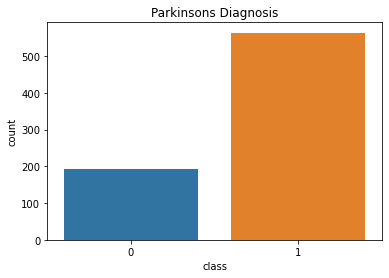

In [6]:
sns.countplot(x='class',data=df)
plt.title("Parkinsons Diagnosis")

# Creating the training and testing splits from the datasets

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)
X_train=X_train.values
X_test=X_test.values

# The dataset has several attributes so it needs to be normalized so the algorithm can be applied to the data. A standard Scaler can be used.

In [8]:
sc=StandardScaler()

sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [9]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier

/Users/akhilesh/opt/anaconda3/envs/Latest/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/akhilesh/opt/anaconda3/envs/Latest/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [22]:
perm=PermutationImportance(estimator=RandomForestClassifier(n_estimators=200, random_state=33, n_jobs=-1),cv=5,random_state=33)
perm.fit(X_train,y_train)

/Users/akhilesh/opt/anaconda3/envs/Latest/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


PermutationImportance(cv=5,
                      estimator=RandomForestClassifier(n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=33),
                      random_state=33)

In [28]:
# Display the explanation of permuation importance
eli5.show_weights(perm,feature_names=X.columns.values)

Weight,Feature
0.0046 ± 0.0115,std_9th_delta
0.0030 ± 0.0092,tqwt_TKEO_mean_dec_35
0.0027 ± 0.0102,std_delta_log_energy
0.0026 ± 0.0077,tqwt_entropy_log_dec_13
0.0026 ± 0.0146,tqwt_TKEO_std_dec_7
0.0023 ± 0.0074,tqwt_skewnessValue_dec_25
0.0023 ± 0.0074,tqwt_entropy_log_dec_33
0.0023 ± 0.0088,tqwt_stdValue_dec_15
0.0023 ± 0.0074,tqwt_TKEO_mean_dec_14
0.0023 ± 0.0128,tqwt_entropy_log_dec_35


In [29]:
from sklearn.feature_selection import SelectFromModel

In [31]:
selector=SelectFromModel(perm)

In [32]:
selector.fit(X_train,y_train)

/Users/akhilesh/opt/anaconda3/envs/Latest/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


SelectFromModel(estimator=PermutationImportance(cv=5,
                                                estimator=RandomForestClassifier(n_estimators=200,
                                                                                 n_jobs=-1,
                                                                                 random_state=33),
                                                random_state=33))

In [33]:
XN_train=selector.transform(X_train)
XN_test=selector.transform(X_test)

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
Ada=AdaBoostClassifier()

In [116]:
Adaptive_Model=Ada.fit(XN_train,y_train)

In [117]:
y_pred=Adaptive_Model.predict(XN_test)

In [118]:
from sklearn import metrics

In [119]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9013157894736842


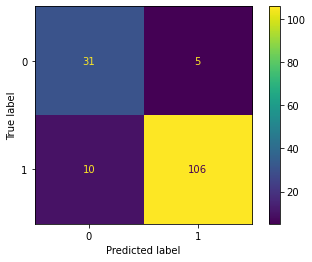

In [54]:
metrics.plot_confusion_matrix(Adaptive_Model,XN_test,y_test)

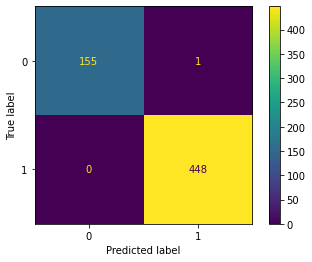

In [149]:
metrics.plot_confusion_matrix(Adaptive_Model,XN_train,y_train)

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dtc=DecisionTreeClassifier(criterion= "gini",random_state=33)

dtc.fit(XN_train,y_train)

y_pred=dtc.predict(XN_test)

In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8289473684210527


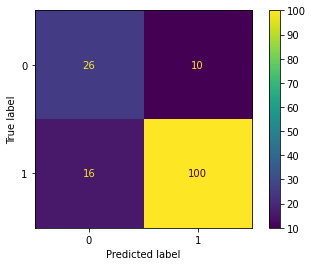

In [138]:
metrics.plot_confusion_matrix(dtc,XN_test,y_test)

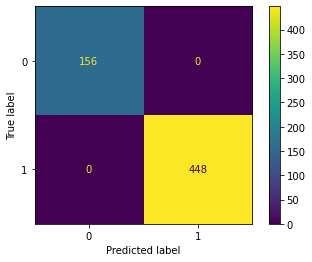

In [139]:
metrics.plot_confusion_matrix(dtc,XN_train,y_train)

In [120]:
from sklearn.naive_bayes import GaussianNB

In [131]:
nb=GaussianNB()

nb.fit(XN_train,y_train)

yG_pred=nb.predict(XN_test)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, yG_pred))

Accuracy: 0.8092105263157895


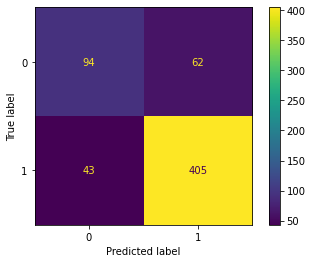

In [155]:
metrics.plot_confusion_matrix(nb,XN_train,y_train)

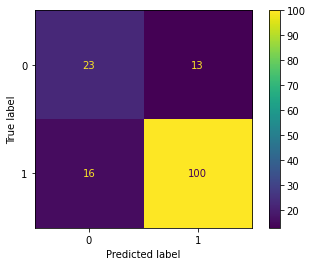

In [156]:
metrics.plot_confusion_matrix(nb,XN_test,y_test)

In [157]:
from sklearn.neural_network import MLPClassifier

In [283]:
MLP=MLPClassifier(hidden_layer_sizes=(8,8,2),activation='relu')

In [284]:
MLP.fit(XN_train,y_train)

/Users/akhilesh/opt/anaconda3/envs/Latest/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8, 2))

In [285]:
yN_pred=MLP.predict(XN_test)

In [286]:
print("Accuracy:",metrics.accuracy_score(y_test, yN_pred))

Accuracy: 0.875


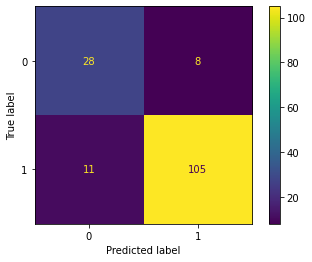

In [287]:
metrics.plot_confusion_matrix(MLP,XN_test,y_test)

In [288]:
print(metrics.classification_report(y_test,yN_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        36
           1       0.93      0.91      0.92       116

    accuracy                           0.88       152
   macro avg       0.82      0.84      0.83       152
weighted avg       0.88      0.88      0.88       152



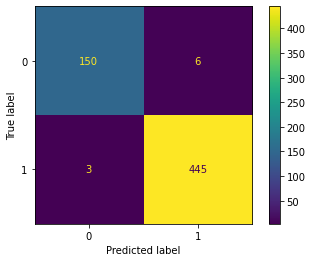

In [289]:
metrics.plot_confusion_matrix(MLP,XN_train,y_train)

In [290]:
trainPredict=MLP.predict(XN_train)
print(metrics.classification_report(y_train,trainPredict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       156
           1       0.99      0.99      0.99       448

    accuracy                           0.99       604
   macro avg       0.98      0.98      0.98       604
weighted avg       0.99      0.99      0.99       604

